In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.colors as col
from matplotlib.ticker import MultipleLocator, AutoMinorLocator, LogLocator
import matplotlib.lines as mlines
from matplotlib.pyplot import text
%matplotlib inline

In [10]:
# load data from prototype
path  ='./input_files/'
file1 = path + 'Phillips_Takahashi_3a_CKE_points.dat'
file2 = path + 'Phillips_Takahashi_3a_CKE_curve.dat'
file3 = path + 'Pierre_Fig14_points.dat'
file4 = path + 'Pierre_Fig20_points.dat'
file4 = path + 'Pierre_Fig20_points.dat'

var   = ['CKE', 'N',]
tab1  = pd.read_csv(file1, delimiter = ',', names=var) 
tab2  = pd.read_csv(file2, delimiter = ',', names=var)
tab3  = pd.read_csv(file3, delimiter = ',', names=var) 
tab4  = pd.read_csv(file4, delimiter = ',', names=var) 
tab5  = pd.read_excel(path + 'Martanda_fragmentation_table.xlsx',  header=1, names=['#','N','v','D_snow','D_sphere','m_snow','CKE'])
tab6  = pd.read_excel(path + 'Martanda_fragmentation_table2.xlsx', header=1, names=['#','N','v','D_snow','D_sphere','m_snow','CKE'])

frame_mart= [tab5, tab6]
mart_data=pd.concat(frame_mart, axis=0)
mart_data.reset_index(drop=True, inplace=True)

# Pierre's fit
N_fit = 5.14 * 1e4 * tab3['CKE']**0.41

# error for CKE from files
cke_error = [5.927879617434876e-07, 2.533222395151227e-07, 2.246698350268315e-07, 7.574799674887515e-07, 8.918868793401822e-07, 8.208639495776669e-07
, 2.544187492669077e-06, 1.8004404080137946e-06, 1.5925793964551125e-06]
N_err = 0.1 * tab3['N'] # estimated to be 10%


In [11]:
# font size and style
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

cm = 'rainbow'

# plot settings
nrow = 1
ncol = 1

leglabels = ['Takahashi \'95','P Fig.14: g-g','P Fig.20: g-s', 'Gautam']
alabels = ['CKE [J]', '$N$']
c_14 = ['red','red','red','green','green','green','blue','blue','blue']
c_20 = ['darkblue','darkblue','orange','orange','darkblue','orange']

c_leg   = [c_14[0],c_14[3],c_14[6],c_20[0],c_20[2]]
lab_leg = ['low $v_\mathrm{imp}$','int. $v_\mathrm{imp}$', 'high $v_\mathrm{imp}$', 'edge', 'central' ] 
m_leg   = ['o','o','o','v','v']

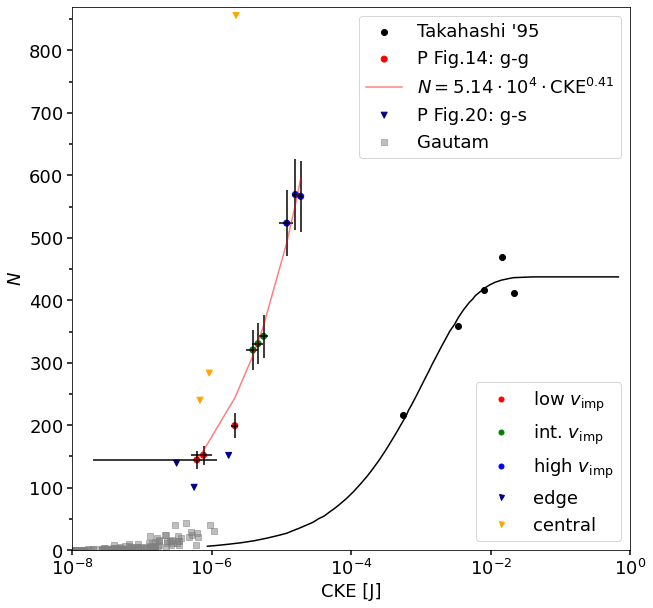

In [12]:
pp = PdfPages('./PDFs/CKE_N_Takahashi.pdf')
# comparing CKE from Takahashi (converted from dyne to J in Phillips et al. 17) to Pierre's Fig.14
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=[10*ncol,10*nrow])
ax = plt.subplot(nrow, ncol, 1)
ax.scatter(tab1['CKE'], tab1['N'], c ='black', label=leglabels[0])
ax.plot(tab2['CKE'], tab2['N'], c ='black')
ax.scatter(tab3['CKE'], tab3['N'], c = c_14, label=leglabels[1])
ax.errorbar(tab3['CKE'], tab3['N'], c = 'black', xerr=cke_error, yerr= N_err, fmt='none')
ax.plot(tab3['CKE'], N_fit, c ='red', alpha=0.5, label='$N=5.14 \cdot 10^4 \cdot \mathrm{CKE}^{0.41}$')
ax.scatter(tab4['CKE'], tab4['N'], c =c_20, marker='v', label=leglabels[2])
ax.scatter(mart_data['CKE'], mart_data['N'], c ='grey', alpha=0.5, marker='s', label=leglabels[3])

ax.yaxis.set_minor_locator(MultipleLocator(50))
ax.tick_params(axis='both', which='major', length=5, width=1.5)
ax.tick_params(axis='both', which='minor', length=3, width=1.5)

plt.xscale('log')
plt.xlabel(alabels[0])
plt.ylabel(alabels[1])
plt.xlim(10**-8,10**0)
plt.ylim(0,870)
first_legend = plt.legend()

handles = []

for i in range(len(m_leg)):
    handles.append(mlines.Line2D([], [], color=c_leg[i], marker=m_leg[i], linestyle='None',
                    markersize=5, label=lab_leg[i]) )

plt.gca().add_artist(first_legend)
plt.legend(handles=handles, loc='lower right')


pp.savefig()

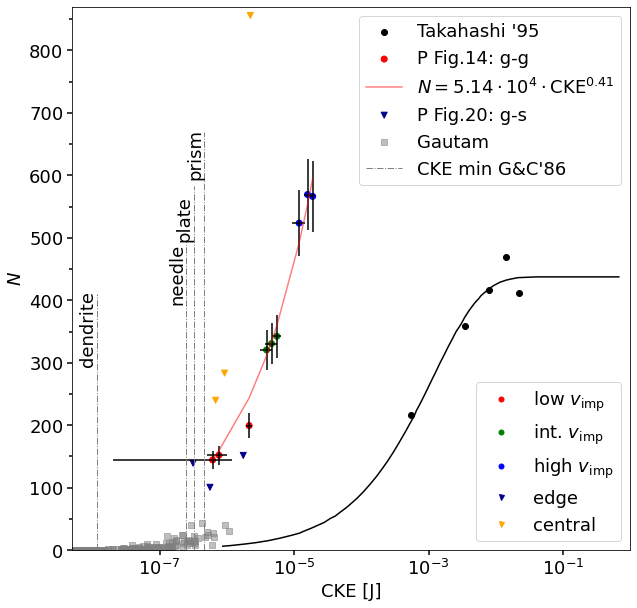

In [13]:
# comparing CKE from Takahashi (converted from dyne to J in Phillips et al. 17) to Pierre's Fig.14
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=[10*ncol,10*nrow])
ax = plt.subplot(nrow, ncol, 1)
ax.scatter(tab1['CKE'], tab1['N'], c ='black', label=leglabels[0])
ax.plot(tab2['CKE'], tab2['N'], c ='black')
ax.scatter(tab3['CKE'], tab3['N'], c = c_14, label=leglabels[1])
ax.errorbar(tab3['CKE'], tab3['N'], c = 'black', xerr=cke_error, yerr= N_err, fmt='none')
ax.plot(tab3['CKE'], N_fit, c ='red', alpha=0.5, label='$N=5.14 \cdot 10^4 \cdot \mathrm{CKE}^{0.41}$')
ax.scatter(tab4['CKE'], tab4['N'], c =c_20, marker='v', label=leglabels[2])
ax.scatter(mart_data['CKE'], mart_data['N'], c ='grey', alpha=0.5, marker='s', label=leglabels[3])

ax.yaxis.set_minor_locator(MultipleLocator(50))
ax.tick_params(axis='both', which='major', length=5, width=1.5)
ax.tick_params(axis='both', which='minor', length=3, width=1.5)

# plate, prism, needle, dendrite
vtext = ['dendrite', 'needle','plate','prism']
vlines=[1.18e-8, 2.46e-7, 3.21e-7, 4.55e-7 ]

plt.vlines(x=vlines, ymin=0, ymax=np.linspace(410,670,4), linestyle='-.', linewidth=1, label='CKE min G&C\'86',color='gray')

plt.xscale('log')
plt.xlabel(alabels[0])
plt.ylabel(alabels[1])
plt.xlim(5e-9,10**0)
plt.ylim(0,870)
first_legend = plt.legend()

handles = []

for i in range(len(m_leg)):
    handles.append(mlines.Line2D([], [], color=c_leg[i], marker=m_leg[i], linestyle='None',
                    markersize=5, label=lab_leg[i]) )

plt.gca().add_artist(first_legend)
plt.legend(handles=handles, loc='lower right')


for i, x in enumerate(vlines):
    text(x, 300+(i*100), vtext[i], rotation=90, verticalalignment='baseline', horizontalalignment='right')

pp.savefig()

In [14]:
pp.close()